In [1]:
from tensorflow import keras 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fashion_mnist = keras.datasets.fashion_mnist


In [3]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

In [4]:
X_train.shape
X_train.max()

255

In [5]:
X_train = (X_train/255.0)
X_test =(X_test/255.0)

In [6]:
X_train = X_train.reshape((60000,28,28,1))
X_test = X_test.reshape((10000,28,28,1))

In [7]:
class_names = ["T-shirt/top","Trouser","pullover","Dress","Coat","Sandal",
               "Shirt","Sneaker","Bag","Ankle boot"]

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=64,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(filters=64,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300,"relu"))
model.add(keras.layers.Dense(100,"relu"))
model.add(keras.layers.Dropout(0.20))
model.add(keras.layers.Dense(10,"softmax"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 64)        1088      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          65600     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 4, 4, 64)          0         
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [10]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "Adam",metrics=["accuracy"])

In [11]:
model.fit(X_train, y_train,epochs= 30)

Epoch 1/30
1875/1875 [==============================] - 12s 4ms/step - loss: 0.5221 - accuracy: 0.8091
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3525 - accuracy: 0.8711
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3105 - accuracy: 0.8843
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2785 - accuracy: 0.8963
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2575 - accuracy: 0.9028
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2406 - accuracy: 0.9091
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2261 - accuracy: 0.9144
Epoch 8/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2125 - accuracy: 0.9204
Epoch 9/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2028 - accuracy: 0.9228
Epoch 10/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.19

In [12]:
history = keras.callbacks.History()

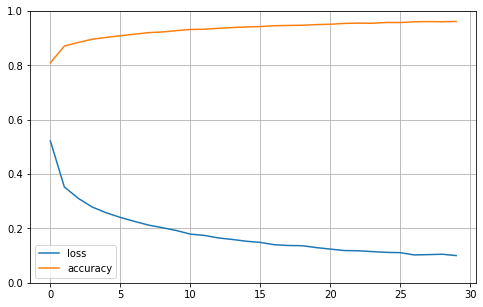

In [13]:
df = pd.DataFrame(model.history.history)
df.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()


In [14]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3590 - accuracy: 0.9107


[0.35895752906799316, 0.9107000231742859]

In [15]:
X_new = X_test[:10]
y_proba = model.predict(X_new)

In [16]:
import numpy as np
y_pred = np.argmax(model.predict(X_new), axis=-1)

In [18]:
y_pred == y_test[:10]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [19]:
np.array(class_names)[y_pred]


array(['Ankle boot', 'pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser',
       'Coat', 'Shirt', 'Sandal', 'Sneaker'], dtype='<U11')

In [20]:
np.array(class_names)[y_test[:10]]


array(['Ankle boot', 'pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser',
       'Coat', 'Shirt', 'Sandal', 'Sneaker'], dtype='<U11')